In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train=pd.read_parquet('train_data.parquet')
df_test=pd.read_parquet('test_data.parquet')

In [3]:
# changing the datatype of multiple columns from object to numerical

def obj_to_num(df,low,high,arr):
    all_f_cols = [f'f{i}' for i in range(low, high+1)]
    exclude_cols = arr
    cols_to_convert = [col for col in all_f_cols if col not in exclude_cols]

    df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

    return df    

In [4]:
# one hot encoder function

def one_hot(df,col):
    df[col] = df[col].fillna('Unknown')  # or 'None'

    encoded = pd.get_dummies(df[col], prefix=col)
    
    df = pd.concat([df, encoded], axis=1)
    df.drop(columns=[col,f'{col}_Unknown'],inplace=True, errors='ignore')


    return df    

In [5]:
# changing data type to numerical for relevant columns

df_train=obj_to_num(df_train,1,51,['f42','f48','f50'])
df_train=obj_to_num(df_train,58,225,[])
df_train=obj_to_num(df_train,226,366,['f349', 'f354'])

# changing the datatype of dependent variable

df_train['y'] = pd.to_numeric(df_train['y'], errors='coerce')

df_train['f48'] = pd.to_numeric(df_train['f48'], errors='coerce')
df_train['f349'] = pd.to_numeric(df_train['f349'], errors='coerce')

In [6]:
# changing data type to numerical for relevant columns

df_test=obj_to_num(df_test,1,51,['f42','f48','f50'])
df_test=obj_to_num(df_test,58,225,[])
df_test=obj_to_num(df_test,226,366,['f349', 'f354'])

# changing the datatype of dependent variable

# df_train['y'] = pd.to_numeric(df_train['y'], errors='coerce')

df_test['f48'] = pd.to_numeric(df_test['f48'], errors='coerce')
df_test['f349'] = pd.to_numeric(df_test['f349'], errors='coerce')

In [7]:
df_test = one_hot(df_test, 'f42')
df_train = one_hot(df_train, 'f42')

In [8]:

df_test = one_hot(df_test, 'f54')
df_test = one_hot(df_test, 'f55')
df_test = one_hot(df_test, 'f56')
df_test = one_hot(df_test, 'f57')

In [9]:

df_train = one_hot(df_train, 'f54')
df_train = one_hot(df_train, 'f55')
df_train = one_hot(df_train, 'f56')
df_train = one_hot(df_train, 'f57')

In [10]:
df_train['f53'] = df_train['f53'].map({'NY': 1, 'NN': 0})
# df['your_column'] = df['your_column'].fillna(0)  # or .fillna(-1) if you want to distinguish None

df_train['f53'] = df_train['f53'].replace({None: np.nan})

In [11]:
## changin the data type with binary type categorical data

df_train['f50'] = df_train['f50'].map({'Y': 1, 'N': 0})
# df['your_column'] = df['your_column'].fillna(0)  # or .fillna(-1) if you want to distinguish None

df_train['f50'] = df_train['f50'].replace({None: np.nan})


df_train['f52'] = df_train['f52'].map({'Y': 1, 'N': 0})
# df['your_column'] = df['your_column'].fillna(0)  # or .fillna(-1) if you want to distinguish None

df_train['f52'] = df_train['f52'].replace({None: np.nan})


df_train['f354'] = df_train['f354'].replace({
    'Phase_1': 0,
    'Rest': 1,
    None: np.nan  # Explicitly convert None to NaN
})


C:\Users\91637\AppData\Local\Temp\ipykernel_39044\1332517543.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['f354'] = df_train['f354'].replace({


In [12]:
## changin the data type with binary type categorical data

df_test['f50'] = df_test['f50'].map({'Y': 1, 'N': 0})
#df['your_column'] = df['your_column'].fillna(0)  # or .fillna(-1) if you want to distinguish None
 
df_test['f50'] = df_test['f50'].replace({None: np.nan})


df_test['f52'] = df_test['f52'].map({'Y': 1, 'N': 0})
# df['your_column'] = df['your_column'].fillna(0)  # or .fillna(-1) if you want to distinguish None

df_test['f52'] = df_test['f52'].replace({None: np.nan})


df_test['f354'] = df_test['f354'].replace({
    'Phase_1': 0,
    'Rest': 1,
    None: np.nan  # Explicitly convert None to NaN
})


C:\Users\91637\AppData\Local\Temp\ipykernel_39044\3356271153.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['f354'] = df_test['f354'].replace({


In [13]:
df_test['f53'] = df_test['f53'].map({'NY': 1, 'NN': 0})
# df['your_column'] = df['your_column'].fillna(0)  # or .fillna(-1) if you want to distinguish None

df_test['f53'] = df_test['f53'].replace({None: np.nan})

In [14]:
# drops the columns with only unique values 0 and NaN

def drop_too(df,low,high):
    cols = [f"f{i}" for i in range(low, high+1)]
    
    # Drop columns where the only unique values are [0.0, NaN] or [0, np.nan]
    cols_to_drop = [
        col for col in cols 
        if set(df[col].dropna().unique()) == {0} and df[col].isnull().any()
    ]
    
    # Now drop them from the DataFrame
    df= df.drop(columns=cols_to_drop, inplace=True),
    return df,print(f"Dropped columns: {cols_to_drop}")

In [15]:
drop_too(df_train,226,309)

Dropped columns: ['f226', 'f229', 'f236', 'f238', 'f240', 'f243', 'f245', 'f246', 'f248', 'f249', 'f258', 'f259', 'f260', 'f262', 'f266', 'f267', 'f268', 'f270', 'f271', 'f277', 'f279', 'f281', 'f286', 'f287', 'f290', 'f291', 'f294', 'f295', 'f298', 'f300', 'f301', 'f303', 'f304', 'f307', 'f308', 'f309']


((None,), None)

In [16]:
drop_too(df_test,226,309)

Dropped columns: ['f226', 'f229', 'f236', 'f238', 'f240', 'f243', 'f245', 'f246', 'f248', 'f249', 'f258', 'f259', 'f260', 'f262', 'f266', 'f267', 'f268', 'f270', 'f271', 'f277', 'f279', 'f281', 'f286', 'f287', 'f290', 'f291', 'f294', 'f295', 'f298', 'f300', 'f301', 'f303', 'f304', 'f307', 'f308', 'f309']


((None,), None)

In [17]:
def bool_con(df):
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)
    return df

In [18]:
df_train=bool_con(df_train)

In [19]:
df_test=bool_con(df_test)

In [20]:
n=[]
for col in df_train.columns:
    if df_train[col].isna().sum()!=0:
        n.append(col)

In [21]:
cols = [f"f{i}" for i in range(350,367)]
df_subset = df_train[cols]


In [22]:
correlation_matrix = df_subset.corr()


In [23]:
print(correlation_matrix)


          f350      f351      f352      f353      f354      f355      f356  \
f350  1.000000  0.001854  0.015302  0.003386 -0.080689  0.050839 -0.037611   
f351  0.001854  1.000000  0.971857 -0.997692 -0.849731 -0.040182 -0.159658   
f352  0.015302  0.971857  1.000000 -0.971037 -0.913275 -0.099951 -0.220746   
f353  0.003386 -0.997692 -0.971037  1.000000  0.836708  0.066387  0.152398   
f354 -0.080689 -0.849731 -0.913275  0.836708  1.000000  0.004609  0.250229   
f355  0.050839 -0.040182 -0.099951  0.066387  0.004609  1.000000  0.371840   
f356 -0.037611 -0.159658 -0.220746  0.152398  0.250229  0.371840  1.000000   
f357 -0.007063 -0.108779 -0.146591  0.097910  0.170067  0.367852  0.378908   
f358  0.017147 -0.978835 -0.912513  0.981429  0.744462 -0.001813  0.004124   
f359  0.000090 -0.004958 -0.004923  0.004992  0.004070  0.001271 -0.000376   
f360       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
f361  0.015752  0.026884  0.026982 -0.024673 -0.026702 -0.019145

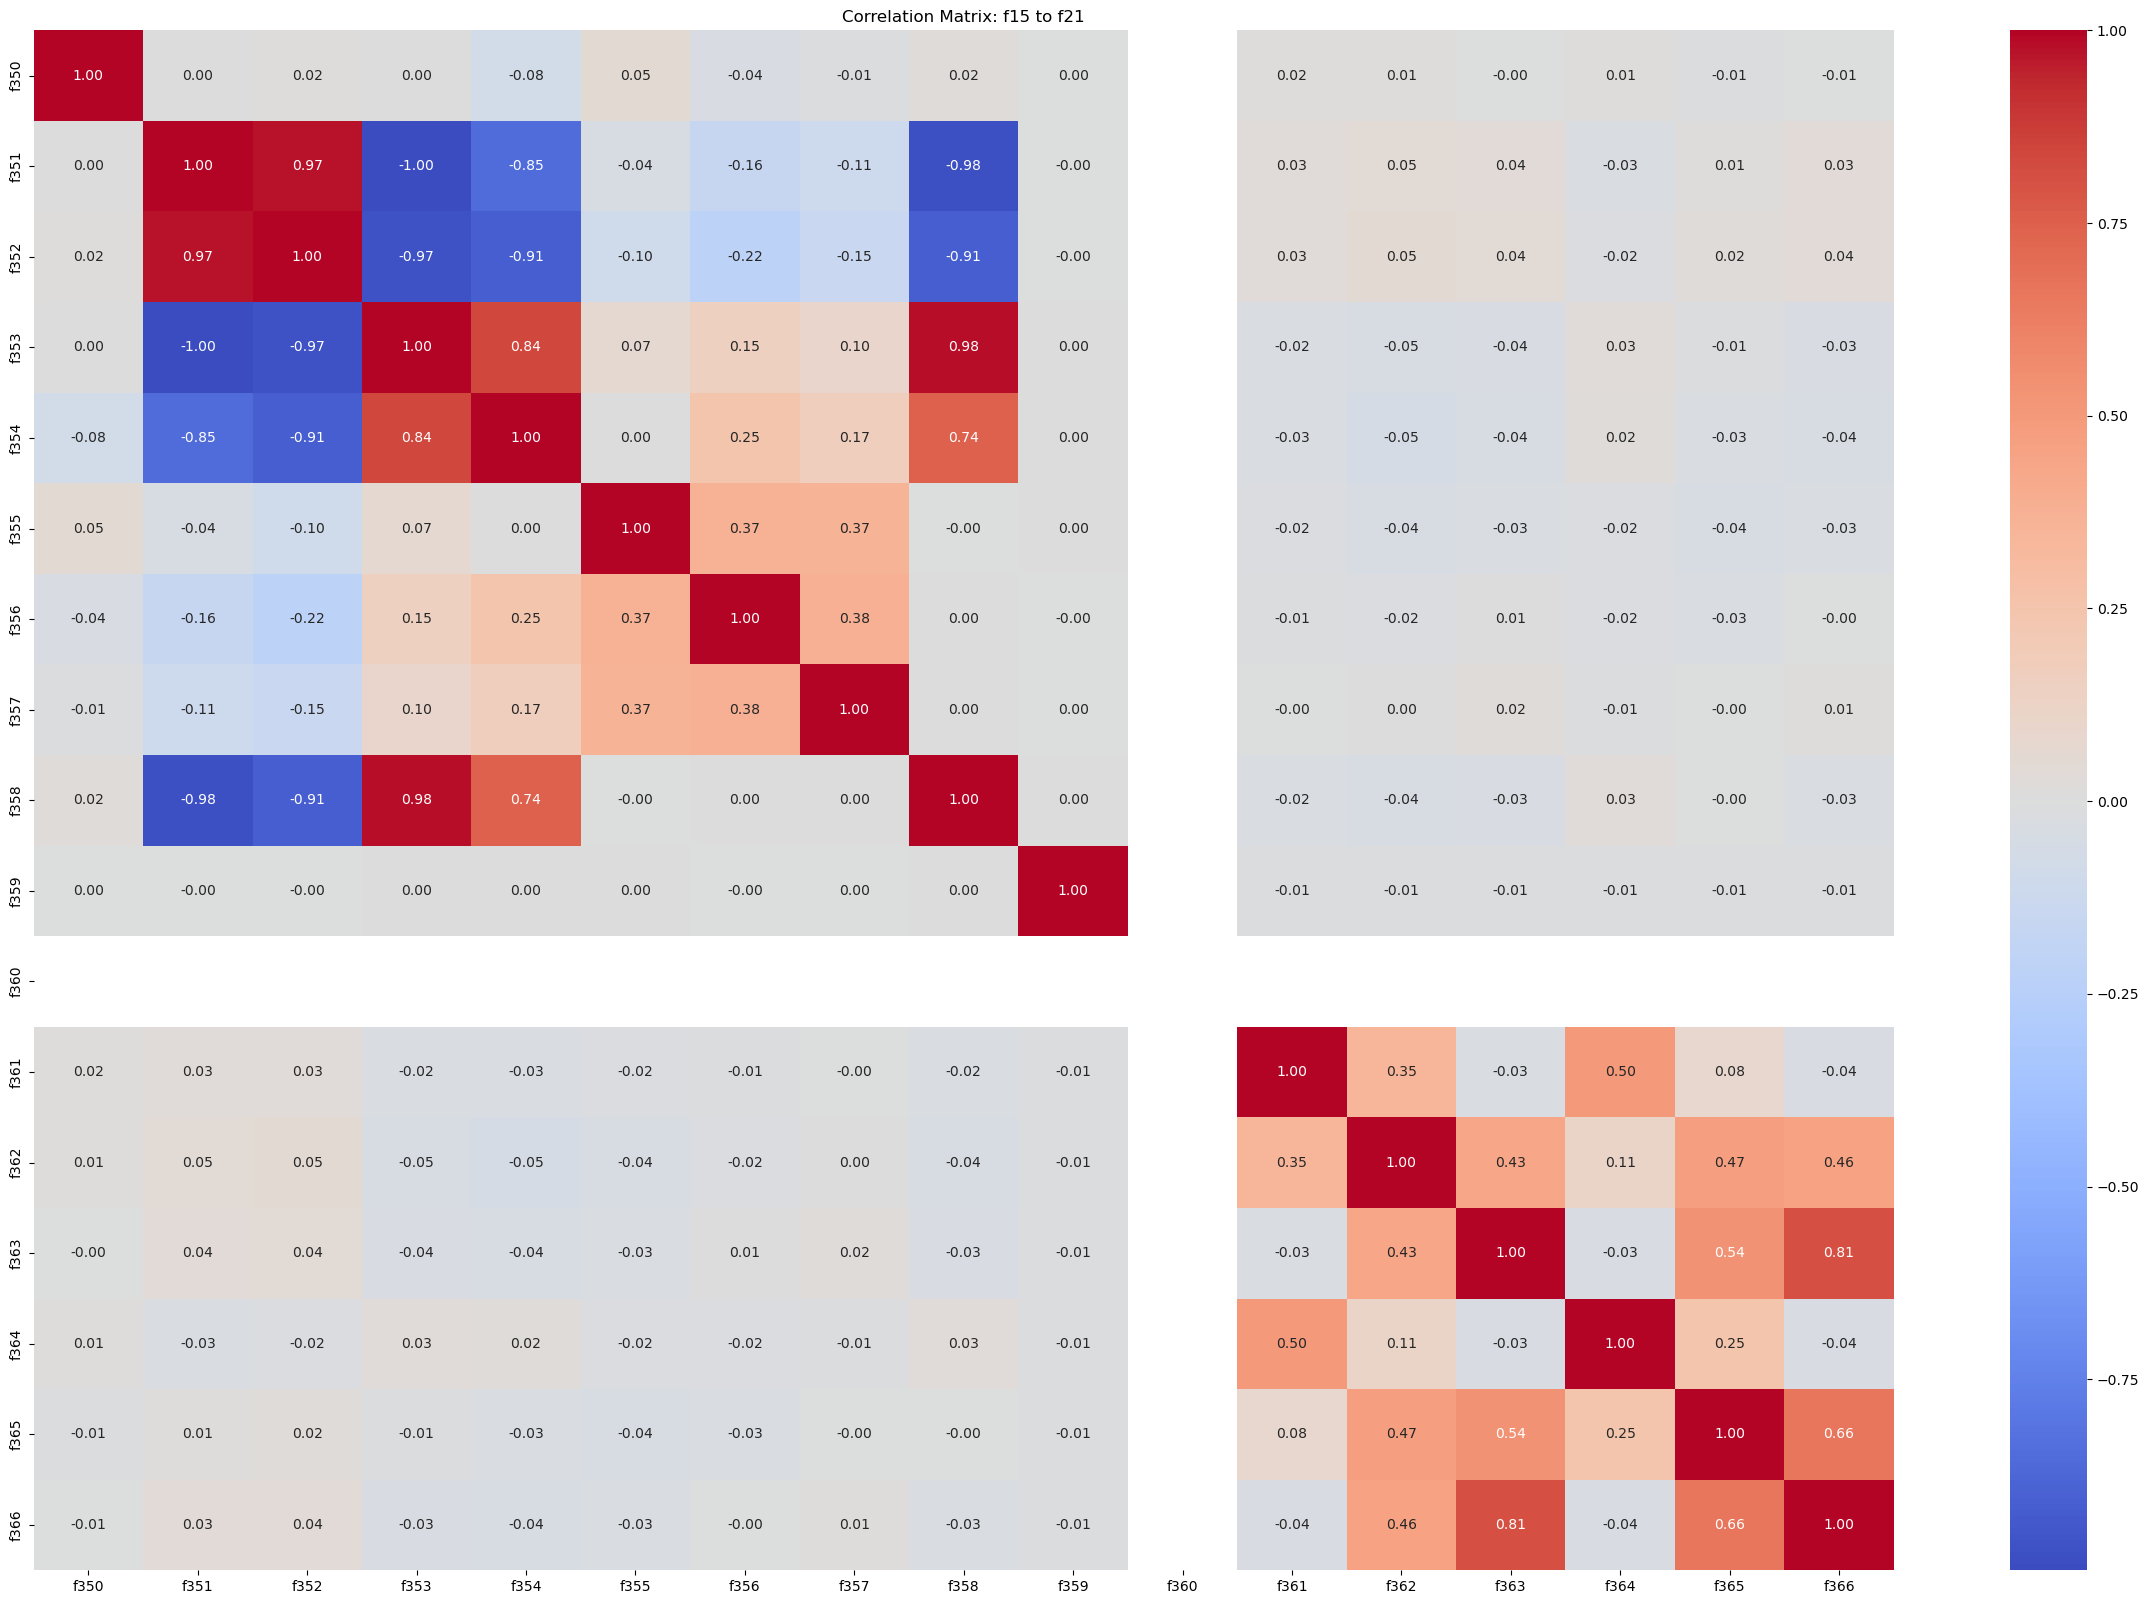

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: f15 to f21")
plt.show()


In [25]:
#f147

In [26]:
cols_to_drop = ['f59', 'f76']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)


In [27]:
cols_to_drop = ['f59', 'f76']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)


In [28]:
cols_to_drop = ['f123', 'f124','f125','f126']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)


In [29]:
cols_to_drop = ['f123', 'f124','f125','f126']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)


In [30]:
cols_to_drop = ['f146']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)


In [31]:
cols_to_drop = ['f146']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)


In [32]:
cols_to_drop = ['f199','f200','f201']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
cols_to_drop = ['f199','f200','f201']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)



In [33]:
cols_to_drop = ['f310']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
cols_to_drop = ['f310']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)

In [34]:
cols_to_drop = ['f332']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
cols_to_drop = ['f332']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)

In [35]:
cols_to_drop = ['f353']
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
cols_to_drop = ['f353']
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)

In [36]:
# print(n)

In [37]:
# m=[]
# for col in df_test.columns:
#     if df_test[col].isna().sum()!=0:
#         m.append(col)

In [44]:
# df_train['id4'] = pd.to_datetime(df_train['id4'], errors='coerce')

df_train['id4'] = pd.to_datetime(df_train['id4'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df_test['id4'] = pd.to_datetime(df_test['id4'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df_train['id5'] = pd.to_datetime(df_train['id5'], format='%Y-%m-%d', errors='coerce')
df_test['id5'] = pd.to_datetime(df_test['id5'], format='%Y-%m-%d', errors='coerce')

In [45]:
df_train.shape

(770164, 346)

In [46]:
missing_values = {col: df_train[col].isna().sum() for col in df_train.columns if df_train[col].isna().sum() > 0}


In [47]:
190663/770164

0.24756155831744928

In [48]:
# missing_values

In [49]:
df_train['f49'].describe()

count    5.795010e+05
mean     1.294729e+04
std      5.770378e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.206269e+06
Name: f49, dtype: float64

In [50]:
770164-769468

696

In [51]:
df_train['f13'].unique()

array([nan,  3.,  4.,  1.,  5.,  2.,  6.,  9.])

In [52]:
# Identify columns to drop from train
threshold = 0.995
drop_cols = df_train.columns[df_train.isna().mean() > threshold]

# Drop from both train and test
df_train = df_train.drop(columns=drop_cols)
df_test = df_test.drop(columns=drop_cols)


In [53]:
for col in df_train.columns:
    if df_train[col].dtype==bool:
        print(col)

In [54]:
# Function to find binary-like columns
def find_binary_columns(df):
    binary_cols = []
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        if set(unique_vals).issubset({0, 1}):
            binary_cols.append(col)
    return binary_cols

# Step 1: Identify binary columns
binary_columns = find_binary_columns(df_train)

# Step 2: Select non-binary columns
non_binary_columns = [col for col in df_train.columns if col not in binary_columns]
extra_cols = [f"f{i}" for i in range(226, 310) if f"f{i}" in df_train.columns]

# Step 3: Combine both lists
final_cols_to_exclude = binary_columns + extra_cols
# Step 3: Calculate missing rates for non-binary columns only
# missing_rate = df_train[non_binary_columns].isnull().mean()

# # Step 4: Group columns by missing rate thresholds
# low_missing = missing_rate[missing_rate < 0.05].index.tolist()
# med_missing = missing_rate[(missing_rate >= 0.05) & (missing_rate < 0.2)].index.tolist()
# high_missing = missing_rate[missing_rate >= 0.2].index.tolist()


In [55]:
# low_missing

In [56]:
# for col in df_test.columns:
#     if col not in final_cols_to_exclude and df_test[col].isna().any():
#         if col in df_train.columns:
#             mean_val = df_train[col].mean()
#             df_test[col].fillna(mean_val, inplace=True)


In [57]:
# for col in df_train.columns:
#     if col not in final_cols_to_exclude and df_train[col].isna().any():
#         df_train[col].fillna(df_train[col].mean(), inplace=True)


In [58]:
missing_values = {col: df_train[col].isna().sum() for col in df_train.columns if df_train[col].isna().sum() > 0}


In [59]:
missing_values


{'f1': np.int64(491658),
 'f2': np.int64(447192),
 'f3': np.int64(661602),
 'f4': np.int64(701295),
 'f5': np.int64(231810),
 'f6': np.int64(150109),
 'f7': np.int64(367438),
 'f8': np.int64(234515),
 'f9': np.int64(284258),
 'f10': np.int64(253665),
 'f11': np.int64(356562),
 'f12': np.int64(242372),
 'f22': np.int64(290324),
 'f23': np.int64(290324),
 'f24': np.int64(290324),
 'f25': np.int64(290324),
 'f26': np.int64(290324),
 'f27': np.int64(290324),
 'f28': np.int64(38651),
 'f29': np.int64(545869),
 'f30': np.int64(75023),
 'f31': np.int64(272616),
 'f32': np.int64(263374),
 'f33': np.int64(741697),
 'f35': np.int64(559275),
 'f36': np.int64(731348),
 'f38': np.int64(16893),
 'f39': np.int64(230721),
 'f40': np.int64(564559),
 'f41': np.int64(183399),
 'f43': np.int64(319428),
 'f44': np.int64(190663),
 'f45': np.int64(190663),
 'f46': np.int64(190663),
 'f47': np.int64(190663),
 'f48': np.int64(503711),
 'f49': np.int64(190663),
 'f50': np.int64(190663),
 'f51': np.int64(190663)

Feature Engineering


In [60]:
event_features=pd.read_csv('event_features.csv')
offer_features=pd.read_csv('offer_features.csv')


In [61]:
df_train['id3'] = df_train['id3'].astype(str)
offer_features['id3'] = offer_features['id3'].astype(str)


In [62]:
df_train = df_train.merge(offer_features, on='id3', how='left')


In [63]:
df_test=df_test.merge(offer_features, on='id3', how='left')

In [64]:
df_train['id3'] = df_train['id3'].astype(str)
event_features['id3'] = event_features['id3'].astype(str)


In [65]:
df_train = df_train.merge(event_features, on='id3', how='left')
df_test = df_test.merge(event_features, on='id3', how='left')


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 494 entries, id1 to clicks_short
dtypes: datetime64[ns](2), float64(450), int64(39), object(3)
memory usage: 2.8+ GB


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 493 entries, id1 to clicks_short
dtypes: datetime64[ns](2), float64(458), int64(30), object(3)
memory usage: 1.4+ GB


In [68]:
print(df_train.shape)
print(df_train.columns)
print(df_train[['id3'] + [col for col in df_train.columns if 'offer_' in col or 'f377' in col]].head())


(770164, 494)
Index(['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4',
       ...
       'num_unique_users', 'num_users_clicked', 'min_click_delay',
       'max_click_delay', 'std_click_delay', 'clicks_immediate', 'clicks_long',
       'clicks_medium', 'clicks_no_click', 'clicks_short'],
      dtype='object', length=494)
         id3  offer_duration_days  offer_competitiveness
0  189706075                 29.0             -25.772727
1      89227                181.0                    NaN
2      35046                 29.0               2.500000
3    6275451                 29.0              -5.190476
4      78053                 29.0             -14.663366


In [69]:
print(f"Shape of df_train: {df_train.shape}")  # Columns should not be >500 ideally


Shape of df_train: (770164, 494)


In [70]:
# from sklearn.preprocessing import MinMaxScaler

# # Step 0: Add 'y' and id columns to exclusion list
# excluded_ids = ['id1', 'id2', 'id3', 'id5', 'y']  # include 'y' here
# datetime_cols = df_train.select_dtypes(include=['datetime64']).columns.tolist()
# all_excluded_cols = list(set(final_cols_to_exclude + excluded_ids + datetime_cols))

# # Step 1: Get numeric columns to scale (excluding the above)
# cols_to_scale = [col for col in df_train.columns 
#                  if col not in all_excluded_cols 
#                  and pd.api.types.is_numeric_dtype(df_train[col])]

# # Step 2: Fit scaler on df_train
# scaler = MinMaxScaler()
# scaler.fit(df_train[cols_to_scale])

# # Step 3: Scale df_train and df_test (only common columns in test)
# common_cols = [col for col in cols_to_scale if col in df_test.columns]

# df_train[cols_to_scale] = scaler.transform(df_train[cols_to_scale])
# df_test[common_cols] = scaler.transform(df_test[common_cols])


In [71]:
# df_train.to_csv("cleaned_df_train.csv", index=False)
# df_test.to_csv("cleaned_df_test.csv", index=False)


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 494 entries, id1 to clicks_short
dtypes: datetime64[ns](2), float64(450), int64(39), object(3)
memory usage: 2.8+ GB


In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369301 entries, 0 to 369300
Columns: 493 entries, id1 to clicks_short
dtypes: datetime64[ns](2), float64(458), int64(30), object(3)
memory usage: 1.4+ GB


Training Starts from here


In [74]:
df_train=df_train.fillna(0)
df_test=df_test.fillna(0)

In [75]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [76]:
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    return df

df_train = clean_column_names(df_train)
df_test = clean_column_names(df_test)

In [77]:
# Step 1: Prepare data
exclude_cols = ['y', 'id3', 'id4', 'id5', 'id1']  # keep id2 for grouping
features = [col for col in df_train.columns if col not in exclude_cols]

X = df_train[features]
y = df_train['y']
groups = df_train['id2']  # for ranking group

In [78]:
# Step 2: Split data
X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
    X, y, groups, test_size=0.2, random_state=42, stratify=y
)


In [79]:
X_train = X_train.copy()
X_val = X_val.copy()
X_train = X_train.drop(columns=['id2'], errors='ignore')
X_val = X_val.drop(columns=['id2'], errors='ignore')

In [80]:
# selector = SelectKBest(score_func=f_classif, k=250)
# selector.fit(X_train, y_train)

# mask = selector.get_support()
# selected_features = X_train.columns[mask]

# X_train_selected = selector.transform(X_train)
# X_val_selected = selector.transform(X_val)

# # Re-wrap as DataFrames
# X_train = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
# X_val = pd.DataFrame(X_val_selected, columns=selected_features, index=X_val.index)

In [81]:
group_train_sizes = groups_train.groupby(groups_train).size().tolist()
group_val_sizes = groups_val.groupby(groups_val).size().tolist()

lgb_train = lgb.Dataset(X_train, label=y_train, group=group_train_sizes)
lgb_val = lgb.Dataset(X_val, label=y_val, group=group_val_sizes, reference=lgb_train)


In [82]:
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import SelectKBest, f_classif
import lightgbm as lgb
import numpy as np

params = {
    'learning_rate': 0.03,
    'num_leaves': 32,          # was 16
    'max_depth': 6,            # was 4
    'min_child_samples': 100,  # was 300
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'n_estimators': 5000,
    'objective': 'lambdarank',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'n_jobs': -1
}


kf = GroupKFold(n_splits=5)
fold = 1
auc_scores = []

for train_idx, val_idx in kf.split(X, y, groups):
    print(f"\n📂 Fold {fold}")
    
    X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Extract and drop group column
    group_train = X_train.pop('id2')
    group_val = X_val.pop('id2')

    # Feature Selection
    selector = SelectKBest(score_func=f_classif, k=250)
    selector.fit(X_train, y_train)

    X_train_selected = selector.transform(X_train)
    X_val_selected = selector.transform(X_val)
    selected_features = X_train.columns[selector.get_support()]

    # Convert back to DataFrame
    X_train = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
    X_val = pd.DataFrame(X_val_selected, columns=selected_features, index=X_val.index)

    # Group sizes
    group_train_sizes = group_train.groupby(group_train).size().tolist()
    group_val_sizes = group_val.groupby(group_val).size().tolist()

    lgb_train = lgb.Dataset(X_train, label=y_train, group=group_train_sizes)
    lgb_val = lgb.Dataset(X_val, label=y_val, group=group_val_sizes, reference=lgb_train)

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_train, lgb_val],
        valid_names=['train', 'valid'],
        num_boost_round=500,
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=50)
        ]
    )

    auc = model.best_score['valid']['auc']
    auc_scores.append(auc)
    print(f"✅ Fold {fold} AUC: {auc:.5f}")
    fold += 1

print(f"\n📊 Average AUC over folds: {np.mean(auc_scores):.5f}")



📂 Fold 1


C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 13  14  15  44  48  67  81 100 101 114 115 262 263 322 328 334 335 338
 339 343 344 345 352 364 369 373 375 390 403 405 412 414 416 421 422 424
 426 427 428 429 430 433 434 437 438 439 441 444 445 447 449 450 456 457] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.932662	valid's auc: 0.886961
[100]	train's auc: 0.940655	valid's auc: 0.888396
[150]	train's auc: 0.945556	valid's auc: 0.889019
Early stopping, best iteration is:
[137]	train's auc: 0.944402	valid's auc: 0.889431
✅ Fold 1 AUC: 0.88943

📂 Fold 2


C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 13  14  15  44  48  67  81 100 101 114 115 262 263 322 328 334 335 338
 339 343 344 345 352 364 369 373 375 390 403 405 412 414 416 421 422 424
 426 427 428 429 430 433 434 437 438 439 441 444 445 447 449 450 456 457] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.930714	valid's auc: 0.911349
[100]	train's auc: 0.93854	valid's auc: 0.912037
[150]	train's auc: 0.943756	valid's auc: 0.912352
[200]	train's auc: 0.947464	valid's auc: 0.913354
[250]	train's auc: 0.949931	valid's auc: 0.913712
Early stopping, best iteration is:
[245]	train's auc: 0.949657	valid's auc: 0.913937
✅ Fold 2 AUC: 0.91394

📂 Fold 3


C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 13  14  15  44  48  67  81 100 101 114 115 262 263 322 328 334 335 338
 339 343 344 345 352 364 369 373 375 390 403 405 412 414 416 421 422 424
 426 427 428 429 430 433 434 437 438 439 441 444 445 447 449 450 456 457] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.930946	valid's auc: 0.923791
[100]	train's auc: 0.939589	valid's auc: 0.926453
[150]	train's auc: 0.944664	valid's auc: 0.927041
Early stopping, best iteration is:
[141]	train's auc: 0.943825	valid's auc: 0.927201
✅ Fold 3 AUC: 0.92720

📂 Fold 4


C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 13  14  15  44  48  67  81 100 101 114 115 262 263 322 328 334 335 338
 339 343 344 345 352 364 369 373 375 390 403 405 412 414 416 417 421 422
 424 426 427 428 429 430 433 434 437 438 439 441 444 445 447 449 450 456
 457] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.926478	valid's auc: 0.923291
[100]	train's auc: 0.936994	valid's auc: 0.928436
[150]	train's auc: 0.942292	valid's auc: 0.929808
[200]	train's auc: 0.946405	valid's auc: 0.930814
[250]	train's auc: 0.94914	valid's auc: 0.931191
[300]	train's auc: 0.951591	valid's auc: 0.931518
[350]	train's auc: 0.953508	valid's auc: 0.931815
[400]	train's auc: 0.955498	valid's auc: 0.931629
Early stopping, best iteration is:
[353]	train's auc: 0.953625	valid's auc: 0.931832
✅ Fold 4 AUC: 0.93183

📂 Fold 5


C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 13  14  15  44  48  67  71  81 100 101 114 115 262 263 322 328 331 334
 335 338 339 343 344 345 352 356 364 369 373 375 390 403 405 412 414 416
 421 422 424 426 427 428 429 430 433 434 437 438 439 441 444 445 447 449
 450 456 457] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.930712	valid's auc: 0.920169
[100]	train's auc: 0.939197	valid's auc: 0.923416
[150]	train's auc: 0.944586	valid's auc: 0.924159
[200]	train's auc: 0.948912	valid's auc: 0.924414
[250]	train's auc: 0.951443	valid's auc: 0.924563
[300]	train's auc: 0.953421	valid's auc: 0.924528
Early stopping, best iteration is:
[257]	train's auc: 0.951713	valid's auc: 0.924606
✅ Fold 5 AUC: 0.92461

📊 Average AUC over folds: 0.91740


In [89]:
# from sklearn.metrics import average_precision_score

# map5_scores = []

# def map_at_k(df, k=5):
#     average_precisions = []
#     for cid, group in df.groupby('customer_id'):
#         y_true = group.sort_values('pred', ascending=False)['label'].values[:k]
#         if y_true.sum() == 0:
#             continue
#         score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
#         average_precisions.append(score)
#     return np.mean(average_precisions)
    
# print(f"📈 Average MAP@5 over folds: {np.mean(map5_scores):.5f}")


In [90]:
# val_preds = model.predict(X_val)

# val_df = X_val.copy()
# val_df['customer_id'] = groups_val.values
# val_df['label'] = y_val.values
# val_df['pred'] = val_preds

# def map_at_k(df, k=5):
#     average_precisions = []
#     for cid, group in df.groupby('customer_id'):
#         y_true = group.sort_values('pred', ascending=False)['label'].values[:k]
#         if y_true.sum() == 0:
#             continue
#         score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
#         average_precisions.append(score)
#     return np.mean(average_precisions)

# map5 = map_at_k(val_df, k=5)
# print("MAP@5:", map5)


In [91]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("group size sum:", sum(group_train_sizes))



X_train shape: (616132, 250)
y_train shape: (616132,)
group size sum: 616132


In [83]:
id_cols = df_test[['id1', 'id2', 'id3', 'id5']].copy()

# Drop excluded cols and select only the selected features
df_test_filtered = df_test.drop(columns=[col for col in exclude_cols if col in df_test.columns])
X_test = df_test_filtered[selected_features]

In [84]:
test_preds = model.predict(X_test)

In [85]:
from sklearn.preprocessing import MinMaxScaler

# Original predictions
# test_preds = model.predict(X_test)

# Scale to [0, 1]
scaler = MinMaxScaler()
test_preds_scaled = scaler.fit_transform(test_preds.reshape(-1, 1)).flatten()

# Add to submission
submission = id_cols.copy()  # id1, id2, id3, id5 already stored
submission['pred'] = test_preds_scaled

# Save CSV
submission.to_csv('submission.csv', index=False)
print("✅ Scaled submission saved as 'submission.csv'")


✅ Scaled submission saved as 'submission.csv'


In [106]:
df_train.shape

(770164, 494)

XG BOOST

In [85]:
import xgboost as xgb

In [86]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [87]:
params = {
    'objective': 'binary:logistic',   # or 'rank:pairwise' for ranking tasks
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'verbosity': 1
}

In [88]:
evals = [(dtrain, 'train'), (dval, 'valid')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10
)

[0]	train-logloss:0.17381	valid-logloss:0.17397
[10]	train-logloss:0.12657	valid-logloss:0.12785
[20]	train-logloss:0.11038	valid-logloss:0.11209
[30]	train-logloss:0.10197	valid-logloss:0.10401
[40]	train-logloss:0.09679	valid-logloss:0.09917
[50]	train-logloss:0.09337	valid-logloss:0.09615
[60]	train-logloss:0.09061	valid-logloss:0.09382
[70]	train-logloss:0.08881	valid-logloss:0.09238
[80]	train-logloss:0.08728	valid-logloss:0.09118
[90]	train-logloss:0.08578	valid-logloss:0.09002
[100]	train-logloss:0.08450	valid-logloss:0.08900
[110]	train-logloss:0.08331	valid-logloss:0.08803
[120]	train-logloss:0.08243	valid-logloss:0.08738
[130]	train-logloss:0.08120	valid-logloss:0.08636
[140]	train-logloss:0.08038	valid-logloss:0.08577
[150]	train-logloss:0.07963	valid-logloss:0.08522
[160]	train-logloss:0.07885	valid-logloss:0.08460
[170]	train-logloss:0.07809	valid-logloss:0.08405
[180]	train-logloss:0.07732	valid-logloss:0.08349
[190]	train-logloss:0.07673	valid-logloss:0.08313
[200]	train

In [91]:
val_preds = model.predict(dval)

# Scale predictions between 0 and 1
val_preds_scaled = MinMaxScaler().fit_transform(val_preds.reshape(-1, 1)).flatten()

val_df = X_val.copy()
val_df['customer_id'] = groups_val.values
val_df['label'] = y_val.values
val_df['pred'] = val_preds_scaled

In [92]:
def map_at_k(df, k=5):
    average_precisions = []
    for cid, group in df.groupby('customer_id'):
        y_true = group.sort_values('pred', ascending=False)['label'].values[:k]
        if y_true.sum() == 0:
            continue
        score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
        average_precisions.append(score)
    return np.mean(average_precisions)

map5 = map_at_k(val_df, k=5)
print("MAP@5:", map5)

MAP@5: 0.8001281841488027


CatBoost

In [93]:
from catboost import CatBoostClassifier, Pool

In [94]:
train_pool = Pool(X_train, label=y_train)
val_pool = Pool(X_val, label=y_val)

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='Logloss',
    verbose=100,
    early_stopping_rounds=50,
    random_seed=42
)

In [95]:
model.fit(train_pool, eval_set=val_pool, use_best_model=True)

0:	learn: 0.6063444	test: 0.6064749	best: 0.6064749 (0)	total: 254ms	remaining: 2m 6s
100:	learn: 0.1008242	test: 0.1025919	best: 0.1025919 (100)	total: 11.8s	remaining: 46.5s
200:	learn: 0.0921085	test: 0.0943892	best: 0.0943892 (200)	total: 23.8s	remaining: 35.4s
300:	learn: 0.0866354	test: 0.0894268	best: 0.0894268 (300)	total: 35.1s	remaining: 23.2s
400:	learn: 0.0828766	test: 0.0861997	best: 0.0861997 (400)	total: 46.5s	remaining: 11.5s
499:	learn: 0.0802713	test: 0.0840914	best: 0.0840914 (499)	total: 57.7s	remaining: 0us

bestTest = 0.08409140778
bestIteration = 499



In [96]:
val_preds_scaled = MinMaxScaler().fit_transform(val_preds.reshape(-1, 1)).flatten()

val_df = X_val.copy()
val_df['customer_id'] = groups_val.values
val_df['label'] = y_val.values
val_df['pred'] = val_preds_scaled

def map_at_k(df, k=5):
    average_precisions = []
    for cid, group in df.groupby('customer_id'):
        y_true = group.sort_values('pred', ascending=False)['label'].values[:k]
        if y_true.sum() == 0:
            continue
        score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
        average_precisions.append(score)
    return np.mean(average_precisions)

map5 = map_at_k(val_df, k=5)
print("MAP@5:", map5)

MAP@5: 0.8001281841488027


Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.5min finished


RandomForestClassifier(max_depth=12, n_estimators=200, n_jobs=-1,
                       random_state=42, verbose=1)

In [99]:
val_preds = rf_model.predict_proba(X_val)[:, 1]

# Scale to [0, 1]
val_preds_scaled = MinMaxScaler().fit_transform(val_preds.reshape(-1, 1)).flatten()

val_df = X_val.copy()
val_df['customer_id'] = groups_val.values
val_df['label'] = y_val.values
val_df['pred'] = val_preds_scaled

def map_at_k(df, k=5):
    average_precisions = []
    for cid, group in df.groupby('customer_id'):
        y_true = group.sort_values('pred', ascending=False)['label'].values[:k]
        if y_true.sum() == 0:
            continue
        score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
        average_precisions.append(score)
    return np.mean(average_precisions)

map5 = map_at_k(val_df, k=5)
print("MAP@5:", map5)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.6s finished


MAP@5: 0.7969297158903205


Nueral Network

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [102]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # output probability
])

C:\Users\91637\anaconda3\envs\prateek\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['AUC'])

In [104]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=512,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/100
1204/1204 - 17s - 14ms/step - AUC: 0.8923 - loss: 0.1186 - val_AUC: 0.9200 - val_loss: 0.1034
Epoch 2/100
1204/1204 - 15s - 12ms/step - AUC: 0.9189 - loss: 0.1026 - val_AUC: 0.9249 - val_loss: 0.0965
Epoch 3/100
1204/1204 - 15s - 12ms/step - AUC: 0.9277 - loss: 0.0958 - val_AUC: 0.9284 - val_loss: 0.0921
Epoch 4/100
1204/1204 - 15s - 12ms/step - AUC: 0.9330 - loss: 0.0908 - val_AUC: 0.9290 - val_loss: 0.0898
Epoch 5/100
1204/1204 - 15s - 12ms/step - AUC: 0.9371 - loss: 0.0874 - val_AUC: 0.9335 - val_loss: 0.0868
Epoch 6/100
1204/1204 - 15s - 12ms/step - AUC: 0.9407 - loss: 0.0846 - val_AUC: 0.9346 - val_loss: 0.0857
Epoch 7/100
1204/1204 - 15s - 12ms/step - AUC: 0.9444 - loss: 0.0823 - val_AUC: 0.9357 - val_loss: 0.0853
Epoch 8/100
1204/1204 - 15s - 12ms/step - AUC: 0.9464 - loss: 0.0807 - val_AUC: 0.9370 - val_loss: 0.0842
Epoch 9/100
1204/1204 - 15s - 12ms/step - AUC: 0.9486 - loss: 0.0790 - val_AUC: 0.9369 - val_loss: 0.0833
Epoch 10/100
1204/1204 - 15s - 12ms/step - AUC

In [105]:
val_preds = model.predict(X_val).flatten()
val_preds_scaled = MinMaxScaler().fit_transform(val_preds.reshape(-1, 1)).flatten()

val_df = pd.DataFrame(X_val, columns=selected_features)
val_df['customer_id'] = groups_val.values
val_df['label'] = y_val.values
val_df['pred'] = val_preds_scaled

4814/4814 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [106]:
def map_at_k(df, k=5):
    average_precisions = []
    for cid, group in df.groupby('customer_id'):
        y_true = group.sort_values('pred', ascending=False)['label'].values[:k]
        if y_true.sum() == 0:
            continue
        score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
        average_precisions.append(score)
    return np.mean(average_precisions)

map5 = map_at_k(val_df, k=5)
print("MAP@5:", map5)

MAP@5: 0.7831786234318997


AutoML

In [ ]:
# !pip install autogluon


In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score

# Step 1: Clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    return df

df_train = clean_column_names(df_train)
df_test = clean_column_names(df_test)

# Step 2: Prepare train/val split
exclude_cols = ['id1', 'id2', 'id3', 'id4', 'id5']
features = [col for col in df_train.columns if col not in exclude_cols + ['y']]
X = df_train[features + ['y', 'id2']]  # keep id2 for evaluation
X_train, X_val = train_test_split(X, test_size=0.2, stratify=X['y'], random_state=42)

# Step 3: Train AutoGluon
label = 'y'
predictor = TabularPredictor(label=label, eval_metric='roc_auc', verbosity=1).fit(
    train_data=X_train,
    time_limit=600,  # optional: seconds
    presets='best_quality'  # slowest but strongest
)

# Step 4: Predict on validation set
val_preds = predictor.predict_proba(X_val)[:, 1]  # probability for class 1

# Step 5: Evaluate MAP@5
val_df = X_val.copy()
val_df['pred'] = MinMaxScaler().fit_transform(val_preds.reshape(-1, 1)).flatten()

def map_at_k(df, k=5):
    average_precisions = []
    for cid, group in df.groupby('id2'):
        y_true = group.sort_values('pred', ascending=False)['y'].values[:k]
        if y_true.sum() == 0:
            continue
        score = average_precision_score(y_true, np.arange(len(y_true), 0, -1))
        average_precisions.append(score)
    return np.mean(average_precisions)

map5 = map_at_k(val_df, k=5)
print("MAP@5:", map5)

# # Step 6: Predict on test set
# id_cols = df_test[['id1', 'id2', 'id3', 'id5']].copy()
# df_test_filtered = df_test.drop(columns=[col for col in exclude_cols if col in df_test.columns])

# # Fill missing columns (if any selected features were absent)
# missing_cols = [col for col in features if col not in df_test_filtered.columns]
# for col in missing_cols:
#     df_test_filtered[col] = 0

# X_test = df_test_filtered[features]
# test_preds = predictor.predict_proba(X_test)[:, 1]
# test_preds_scaled = MinMaxScaler().fit_transform(test_preds.reshape(-1, 1)).flatten()

# # Step 7: Submission
# submission = id_cols.copy()
# submission['pred'] = test_preds_scaled
# submission.to_csv('submission.csv', index=False)
# print("✅ AutoGluon submission saved as 'submission.csv'")
